<a href="https://colab.research.google.com/github/Arisarayangyoo/bcs_dpdm24/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.chdir('/content/drive/MyDrive/Data/Data_BSC')

!pwd # เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/Data/Data_BSC


In [7]:
unit_type_data = pd.read_csv("/content/drive/MyDrive/Data/Data_BSC/opendata_unittype.csv")

## Data explore

In [27]:
unit_type_data.head()
#เเบบบ้านนี้อยู่ในโครงการไหนบ้าง

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,percentage,area_total_min_wa_percentage
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,NaN,250.0,50200000.0,...,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31,NaN,NaN
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,132.0,3666666.0,...,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31,NaN,NaN
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,NaN,45.0,3250000.0,...,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31,NaN,NaN
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,NaN,25.0,989000.0,...,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31,NaN,NaN
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,NaN,80.0,2140000.0,...,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31,NaN,NaN


In [9]:
unit_type_data.shape

(43963, 28)

In [10]:
unit_type_data.columns

Index(['row_number', 'unittype_id', 'project_id', 'name_th', 'propertytype_id',
       'propertytype_name_en', 'propertytype_name_th', 'area_total_min_wa',
       'area_usable_min', 'price_min', 'count_airconditioner',
       'count_elevator', 'count_floor_internal', 'count_parking',
       'count_room_bath', 'count_room_bed', 'count_room_dinning',
       'count_room_guest', 'count_room_kitchen', 'count_room_living',
       'count_room_maid', 'count_room_storage', 'count_room_utility',
       'date_created', 'date_updated', 'source', 'url_unittype', 'day'],
      dtype='object')

#Cleaning Data

##Missing(incomplete) Data

In [11]:
unit_type_data.isnull().any()
# check missing

,0
row_number,False
unittype_id,False
project_id,False
name_th,False
propertytype_id,False
propertytype_name_en,False
propertytype_name_th,False
area_total_min_wa,True
area_usable_min,True
price_min,True


In [12]:
unit_type_data.dropna(subset="area_total_min_wa")
#เเก้ด้วยการเติม unknow หรือจัดกลุ่มตามขนาดบ้าน(propertytype_id)เเล้วค่อยเติมค่าจะดีกว่า ห้ามเติม 0 มันมีความหมายว่าไม่มีพื้นที่บ้านซึ่งเป็นไปไม่ได้

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
5,8741,unittype_1672,project_868,บ้านธารธารา,1,Detached House,บ้าน,47.0,80.0,3300000.0,...,1.0,NaN,NaN,NaN,NaN,2022-01-28 11:30:04,2022-01-28 11:27:16,baania,https://baania.com/th/project/สมหวังพร็อพเพอร์...,2023-08-31
19,1091,unittype_611,project_195,บ้านพิมพ์ลาวัลย์,1,Detached House,บ้าน,56.0,110.0,2114000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:39,2020-10-14 21:12:50,baania,https://baania.com/th/project/บ้านปรารถนาพลัส-...,2023-08-31
36,31127,unittype_17466,project_6982,บ้านพูนลาภ,1,Detached House,บ้าน,37.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:19:44,2020-10-14 00:42:03,baania,https://baania.com/th/project/บ้านสินทรัพย์-รั...,2023-08-31
48,32130,unittype_33718,project_14438,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,75.0,165.0,4500000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:23:54,2020-10-14 22:08:52,baania,https://baania.com/th/project/บ้านสิรินาคร-144...,2023-08-31
50,9901,unittype_4131,project_1341,Dream 3 Modern,1,Detached House,บ้าน,88.0,149.0,2790000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:27:31,2021-01-07 14:34:49,baania,https://baania.com/th/project/ณิชากู๊ดวิลล์-13...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43836,31431,unittype_13841,project_5448,บ้านเดี่ยวสองชั้น Type A,1,Detached House,บ้าน,44.0,159.0,3300000.0,...,NaN,1.0,NaN,NaN,NaN,2021-11-12 13:28:35,2021-01-13 10:52:21,baania,https://baania.com/th/project/บ้านปรารถนา-พาวิ...,2023-08-31
43888,28941,unittype_25661,project_10261,เรือนพราวนภา,1,Detached House,บ้าน,8.0,235.0,6630000.0,...,1.0,NaN,NaN,2.0,NaN,2021-11-12 13:24:29,2020-10-14 23:35:07,baania,https://baania.com/th/project/บ้านศุมิตรารมย์-...,2023-08-31
43893,8618,unittype_437,project_128,Alpes,1,Detached House,บ้าน,50.0,148.0,4300000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:25:44,2020-11-17 16:00:36,baania,https://baania.com/th/project/วรารมย์-พรีเมี่ย...,2023-08-31
43895,13020,unittype_23916,project_9549,Cozy,3,Townhome,ทาวน์โฮม,17.4,90.0,1500000.0,...,1.0,NaN,NaN,NaN,NaN,2021-11-12 13:28:48,2021-01-13 15:18:52,baania,https://baania.com/th/project/บ้านพฤกษานารา-หน...,2023-08-31


In [13]:
print(f'{unit_type_data.dropna(subset="area_total_min_wa").shape[0]*100/unit_type_data.shape[0]:.2f}%left')

6.87%left


In [14]:
set(unit_type_data.dropna(subset="area_total_min_wa")['propertytype_name_th'])

{'ทาวน์โฮม', 'ที่ดิน', 'บ้าน', 'บ้านแฝด', 'อาคารพาณิชย์', 'โฮมออฟฟิศ'}

# HW1 เติมพื้นที่บ้านเป็น ตรว. จากพื้นที่ใช้สอยเป็น ตรม.เฉพาะข้อมูลคอนโด
- เขียนว่า ข้อมูลอสังหาอื่นๆ ควรเติมพื้นที่บ้านยังไง

In [67]:
unit_type = pd.read_csv("/content/drive/MyDrive/Data/Data_BSC/opendata_unittype.csv")
unit_type

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,NaN,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,NaN,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,NaN,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,NaN,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,24030,64a69b679ac98e00137baccc,64a69aa99ac98e00137bacc5,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-13 18:30:02,2023-07-13 18:08:11,baania,https://baania.com/th/project/พาราวิลล์-7-64a6...,2023-08-31
43959,27439,unittype_13626,project_5336,1 Bedroom,2,Condo,คอนโด,NaN,32.0,1900000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:33:33,2021-07-15 15:18:28,baania,https://baania.com/th/project/เวนโต้-คอนโด-เกษ...,2023-08-31
43960,1780,unittype_5858,project_1921,Delux Type E,2,Condo,คอนโด,NaN,35.0,1870000.0,...,1.0,1.0,NaN,NaN,NaN,2022-10-17 12:00:18,2022-10-17 11:51:21,baania,https://baania.com/th/project/ริเวนเดลล์-แอปโซ...,2023-08-31
43961,19135,60c0850ce5834700138692ac,project_13885,1 Bedroom Plus,2,Condo,คอนโด,NaN,30.5,2490000.0,...,NaN,NaN,NaN,NaN,1.0,2023-06-12 14:30:03,2023-06-12 14:15:31,baania,https://baania.com/th/project/เคนซิงตัน-สุขุมว...,2023-08-31


- เนื่องจากพื้นที่ใช้สอยของคอนโด จะนับพื้นที่ทั้งหมดของคอนโดซึ่งสามารถอนุมาณได้ว่าพื้นที่ใช้สอยของคอนโดเท่ากับพื้นที่ดินทั้งหมด (คูณด้วย0.25เปลี่ยนจากตารางเมตรเป็นตารางวาได้เลย)


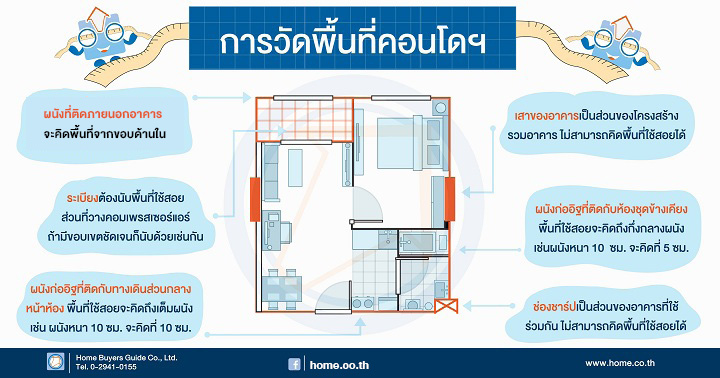

In [75]:
# Replace 'area_total_min_wa' for Condo with area_usable_min * 0.25
unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_total_min_wa'] = unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_usable_min'] * 0.25
unit_type

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,62.500,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,22.300,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,11.250,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,6.250,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,55.300,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,24030,64a69b679ac98e00137baccc,64a69aa99ac98e00137bacc5,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,55.300,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-13 18:30:02,2023-07-13 18:08:11,baania,https://baania.com/th/project/พาราวิลล์-7-64a6...,2023-08-31
43959,27439,unittype_13626,project_5336,1 Bedroom,2,Condo,คอนโด,8.000,32.0,1900000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:33:33,2021-07-15 15:18:28,baania,https://baania.com/th/project/เวนโต้-คอนโด-เกษ...,2023-08-31
43960,1780,unittype_5858,project_1921,Delux Type E,2,Condo,คอนโด,8.750,35.0,1870000.0,...,1.0,1.0,NaN,NaN,NaN,2022-10-17 12:00:18,2022-10-17 11:51:21,baania,https://baania.com/th/project/ริเวนเดลล์-แอปโซ...,2023-08-31
43961,19135,60c0850ce5834700138692ac,project_13885,1 Bedroom Plus,2,Condo,คอนโด,7.625,30.5,2490000.0,...,NaN,NaN,NaN,NaN,1.0,2023-06-12 14:30:03,2023-06-12 14:15:31,baania,https://baania.com/th/project/เคนซิงตัน-สุขุมว...,2023-08-31


In [76]:
# prompt: หาค่าเฉลี่ย area_total_min_wa เเค่ของคอนโดเเล้วเติมในช่องว่างคอนโด

# Calculate the mean of 'area_total_min_wa' for condos
mean_condo_area = unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_total_min_wa'].mean()

# Fill NaN values in 'area_total_min_wa' for condos with the calculated mean
unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_total_min_wa'] = unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_total_min_wa'].fillna(mean_condo_area)

unit_type

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,62.500,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,22.300,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,11.250,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,6.250,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,55.300,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,24030,64a69b679ac98e00137baccc,64a69aa99ac98e00137bacc5,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,55.300,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-13 18:30:02,2023-07-13 18:08:11,baania,https://baania.com/th/project/พาราวิลล์-7-64a6...,2023-08-31
43959,27439,unittype_13626,project_5336,1 Bedroom,2,Condo,คอนโด,8.000,32.0,1900000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:33:33,2021-07-15 15:18:28,baania,https://baania.com/th/project/เวนโต้-คอนโด-เกษ...,2023-08-31
43960,1780,unittype_5858,project_1921,Delux Type E,2,Condo,คอนโด,8.750,35.0,1870000.0,...,1.0,1.0,NaN,NaN,NaN,2022-10-17 12:00:18,2022-10-17 11:51:21,baania,https://baania.com/th/project/ริเวนเดลล์-แอปโซ...,2023-08-31
43961,19135,60c0850ce5834700138692ac,project_13885,1 Bedroom Plus,2,Condo,คอนโด,7.625,30.5,2490000.0,...,NaN,NaN,NaN,NaN,1.0,2023-06-12 14:30:03,2023-06-12 14:15:31,baania,https://baania.com/th/project/เคนซิงตัน-สุขุมว...,2023-08-31


In [77]:
# prompt: เช็คว่า area_total_min_wa ของคอนโดมี Nan มั้ย

# Check for NaN values in 'area_total_min_wa' for condos
nan_count = unit_type.loc[unit_type['propertytype_name_en'] == 'Condo', 'area_total_min_wa'].isnull().sum()

if nan_count > 0:
  print(f"There are {nan_count} NaN values in 'area_total_min_wa' for condos.")
else:
  print("There are no NaN values in 'area_total_min_wa' for condos.")

There are no NaN values in 'area_total_min_wa' for condos.


- ในส่วนของอสังหาริมทรัพทย์อื่น ๆ ขนาดของ area_total_min_wa ไม่ได้มีรูปเเบบที่ตายตัว(เช่นเป็น 10% ของ area_usable_min ) เนื่องจากเเม้จะเป็นประเภทเดียวกัน เเต่เป็นของคนละโครงการ จึงเลือกที่จะจัดกลุ่มเเต่ละประเภทแล้วหาค่าเฉลี่ยของ area_total_min_wa ของเเต่ละประเภทเติมลงไปเเทน

In [87]:
# prompt: จัดกลุ่มตาม propertytype_id หาค่าเฉลี่ยของ area_total_min_wa เเต่ละกลุ่มเเล้วเติมใส่ช่องว่าง Nanเเต่ละกลุ่ม

# Group by 'propertytype_id' and calculate the mean of 'area_total_min_wa' for each group
mean_area_by_property_type = unit_type.groupby('propertytype_id')['area_total_min_wa'].mean()

# Fill NaN values in 'area_total_min_wa' with the mean for each 'propertytype_id' group
unit_type['area_total_min_wa'] = unit_type.apply(lambda row: mean_area_by_property_type[row['propertytype_id']] if pd.isnull(row['area_total_min_wa']) else row['area_total_min_wa'], axis=1)
unit_type

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,62.5,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,22.3,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,11.2,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,6.2,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,55.3,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,24030,64a69b679ac98e00137baccc,64a69aa99ac98e00137bacc5,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,55.3,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-13 18:30:02,2023-07-13 18:08:11,baania,https://baania.com/th/project/พาราวิลล์-7-64a6...,2023-08-31
43959,27439,unittype_13626,project_5336,1 Bedroom,2,Condo,คอนโด,8.0,32.0,1900000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:33:33,2021-07-15 15:18:28,baania,https://baania.com/th/project/เวนโต้-คอนโด-เกษ...,2023-08-31
43960,1780,unittype_5858,project_1921,Delux Type E,2,Condo,คอนโด,8.8,35.0,1870000.0,...,1.0,1.0,NaN,NaN,NaN,2022-10-17 12:00:18,2022-10-17 11:51:21,baania,https://baania.com/th/project/ริเวนเดลล์-แอปโซ...,2023-08-31
43961,19135,60c0850ce5834700138692ac,project_13885,1 Bedroom Plus,2,Condo,คอนโด,7.6,30.5,2490000.0,...,NaN,NaN,NaN,NaN,1.0,2023-06-12 14:30:03,2023-06-12 14:15:31,baania,https://baania.com/th/project/เคนซิงตัน-สุขุมว...,2023-08-31


In [88]:
# Round 'area_total_min_wa' to one decimal place
unit_type['area_total_min_wa'] = unit_type['area_total_min_wa'].round(1)

unit_type

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,4441,unittype_11075,project_3853,4 Bedroom,2,Condo,คอนโด,62.5,250.0,50200000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:56,2020-10-14 00:57:57,baania,https://baania.com/th/project/โดมัส-16-3853/4-...,2023-08-31
1,28021,unittype_18174,project_7334,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,22.3,132.0,3666666.0,...,NaN,1.0,NaN,NaN,NaN,2020-12-04 10:37:28,2020-10-14 00:43:47,baania,https://baania.com/th/project/บ้านเมฆธารา-2-73...,2023-08-31
2,14541,unittype_35595,project_15267,1 Bedroom,2,Condo,คอนโด,11.2,45.0,3250000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:30,2020-10-14 00:55:24,baania,https://baania.com/th/project/เดอะ-เซสท์-ลาดพร...,2023-08-31
3,21478,6305c503713e23001a6a67b3,6305c4af713e23001a6a67af,1 Bedroom,2,Condo,คอนโด,6.2,25.0,989000.0,...,NaN,NaN,NaN,NaN,NaN,2023-05-31 14:30:02,2023-05-31 14:13:32,baania,https://baania.com/th/project/เสนาคิทท์-บางนา-...,2023-08-31
4,11573,unittype_34957,project_5556,บ้านเดี่ยว SB2,1,Detached House,บ้าน,55.3,80.0,2140000.0,...,1.0,1.0,NaN,NaN,NaN,2023-03-23 12:00:05,2023-03-23 11:41:33,baania,https://baania.com/th/project/วี-อไลฟ์-ลำลูกกา...,2023-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43958,24030,64a69b679ac98e00137baccc,64a69aa99ac98e00137bacc5,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,55.3,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-07-13 18:30:02,2023-07-13 18:08:11,baania,https://baania.com/th/project/พาราวิลล์-7-64a6...,2023-08-31
43959,27439,unittype_13626,project_5336,1 Bedroom,2,Condo,คอนโด,8.0,32.0,1900000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:33:33,2021-07-15 15:18:28,baania,https://baania.com/th/project/เวนโต้-คอนโด-เกษ...,2023-08-31
43960,1780,unittype_5858,project_1921,Delux Type E,2,Condo,คอนโด,8.8,35.0,1870000.0,...,1.0,1.0,NaN,NaN,NaN,2022-10-17 12:00:18,2022-10-17 11:51:21,baania,https://baania.com/th/project/ริเวนเดลล์-แอปโซ...,2023-08-31
43961,19135,60c0850ce5834700138692ac,project_13885,1 Bedroom Plus,2,Condo,คอนโด,7.6,30.5,2490000.0,...,NaN,NaN,NaN,NaN,1.0,2023-06-12 14:30:03,2023-06-12 14:15:31,baania,https://baania.com/th/project/เคนซิงตัน-สุขุมว...,2023-08-31


# ข้อมูลบางส่วนมีค่าตัวแปรบางตัวที่ไม่ทราบค่า (Missing Data)

## Example

In [ ]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

### เราจะลบ Price ของ Record ที่เป็น Clothing, Cash, Metrocity เพื่อจำลอง Missing Value

#### ตรวจสอบค่า ก่อนการ missing

In [ ]:
shop_miss = shopping_data[(shopping_data['category']== 'Clothing') &
 (shopping_data['payment_method']== 'Cash') &
  (shopping_data['shopping_mall']== 'Metrocity')]

In [ ]:
shop_miss

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,300.08,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,300.08,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,900.24,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,300.08,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [ ]:
shop_miss.describe()

,age,quantity,price
count,2284.000000,2284.000000,2284.000000
mean,43.657618,2.982049,894.853275
std,14.974270,1.408979,422.806539
min,18.000000,1.000000,300.080000
25%,30.750000,2.000000,600.160000
50%,44.000000,3.000000,900.240000
75%,57.000000,4.000000,1200.320000
max,69.000000,5.000000,1500.400000


#### ทำให้ price missing

In [ ]:
shop_miss['price'] = np.nan

<ipython-input-10-8ee4b50b52d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_miss['price'] = np.nan


In [ ]:
shop_miss

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,NaN,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,NaN,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,NaN,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,NaN,Cash,25/02/2023,Metrocity


#### แยก data ส่วนที่ไม่ missing ออกมา

In [ ]:
# ต้องแยกออก เพราะ ถ้าไม่แยกก่อน ข้อมูลจะเยอะเกินไป อาจเกิดการซ้อนทับของข้อมูล
shop_nomiss = shopping_data[(shopping_data['category']!= 'Clothing') |
 (shopping_data['payment_method']!= 'Cash') |
  (shopping_data['shopping_mall']!= 'Metrocity')]

#### จับกลับมารวมกัน

In [ ]:
new_shopping_data = pd.concat([shop_miss,shop_nomiss])
new_shopping_data.shape

(99457, 10)

## Fix

In [ ]:
new_shopping_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
new_shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price              True
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

### 1. Ignore Missing (ลบออกไปเลย)

#### Quiz 1


*   Data หายไปกี่ %
*   mean data รวมหลังจากแก้ missing เป็นเท่าไหร่



In [ ]:
new_shopping_data_drop = new_shopping_data.dropna()

In [ ]:
100*((len(new_shopping_data)-len(new_shopping_data_drop))/len(new_shopping_data))

2.2964698311833254

In [ ]:
new_shopping_data_drop.describe()

,age,quantity,price
count,97173.000000,97173.000000,97173.000000
mean,43.421671,3.003931,684.423873
std,14.990459,1.413123,949.438067
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,40.660000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


### 2. เติมด้วย Unknown *เราจะเติมกับข้อมูล categorical

### 3. เติมด้วย mean

#### Quiz 2


*   mean ใหม่ เป็นเท่าไหร่?



In [ ]:
mean_fill = new_shopping_data_drop['price'].mean()
mean_fill

684.4238731952291

### 4. เติมด้วยค่าเฉลี่ยของกลุ่ม

#### Quiz 3


*   mean หลังเติมด้วยค่าเฉลี่ย Clothing
*   mean หลังเติมด้วยค่าเฉลี่ย Cash
*   mean หลังเติมด้วยค่าเฉลี่ย Metrocity
*   mean หลังเติมด้วยค่าเฉลี่ย Cash + Metrocity




##### mean หลังเติมด้วยค่าเฉลี่ย Clothing

In [ ]:
na_clothing = new_shopping_data[new_shopping_data['category']=='Clothing']
na_clothing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99435,I141871,C298790,Female,62,Clothing,3,900.24,Cash,2/2/2022,Emaar Square Mall
99436,I579905,C265057,Female,57,Clothing,5,1500.40,Cash,27/03/2022,Cevahir AVM
99440,I887161,C137631,Female,58,Clothing,1,300.08,Cash,22/06/2021,Kanyon
99442,I105959,C131810,Female,45,Clothing,4,1200.32,Debit Card,1/2/2021,Istinye Park


In [ ]:
na_clothing['price'].mean()

901.5259373350307

In [ ]:
fillna_clothing = new_shopping_data.fillna(na_clothing['price'].mean())
fillna_clothing

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,901.525937,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,901.525937,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,901.525937,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,901.525937,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,901.525937,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [ ]:
fillna_clothing.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.409557
std,14.990054,1.413025,939.036135
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
fillna_clothing['price'].mean()

689.4095566010759

 ##### mean หลังเติมด้วยค่าเฉลี่ย Cash

In [ ]:
na_cash = new_shopping_data[new_shopping_data['payment_method']=='Cash']
na_cash

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon
99450,I170504,C226974,Female,28,Books,1,15.15,Cash,28/02/2023,Zorlu Center
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul


In [ ]:
na_cash['price'].mean()

679.7710338448402

In [ ]:
fillna_cash = new_shopping_data.fillna(na_cash['price'].mean())
fillna_cash

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,679.771034,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,679.771034,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,679.771034,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,679.771034,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,679.771034,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [ ]:
fillna_cash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,684.317022
std,14.990054,1.413025,938.473117
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
fillna_cash['price'].mean()

684.317022143254

##### mean หลังเติมด้วยค่าเฉลี่ย Metrocity

In [ ]:
na_metro = new_shopping_data[new_shopping_data['shopping_mall']=='Metrocity']
na_metro

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,NaN,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,NaN,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,NaN,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,NaN,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,NaN,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99405,I651573,C425890,Male,56,Shoes,3,1800.51,Debit Card,2/8/2022,Metrocity
99408,I949512,C217355,Female,47,Clothing,2,600.16,Credit Card,21/02/2021,Metrocity
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity
99433,I403904,C142643,Male,28,Toys,1,35.84,Credit Card,2/11/2022,Metrocity


In [ ]:
na_metro['price'].mean()

644.7815816767502

In [ ]:
fillna_metro = new_shopping_data.fillna(na_metro['price'].mean())
fillna_metro

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,644.781582,Cash,9/11/2021,Metrocity
382,I591015,C286181,Female,69,Clothing,1,644.781582,Cash,12/9/2021,Metrocity
446,I423124,C109593,Female,66,Clothing,1,644.781582,Cash,7/1/2023,Metrocity
531,I223795,C280596,Male,40,Clothing,3,644.781582,Cash,26/12/2022,Metrocity
647,I891465,C175833,Female,19,Clothing,1,644.781582,Cash,21/07/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.650000,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.460000,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.460000,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.000000,Cash,16/03/2021,Istinye Park


In [ ]:
fillna_metro.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,683.513500
std,14.990054,1.413025,938.491645
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
fillna_metro['price'].mean()

683.5134999301174

##### mean หลังเติมด้วยค่าเฉลี่ย Cash + Metrocity

In [ ]:
new_shopping_data_fillmegacash = new_shopping_data.fillna(
    {'price':new_shopping_data[(new_shopping_data['shopping_mall']=='Metrocity') &
                               (new_shopping_data['payment_method']=='Cash')]['price'].mean()})
new_shopping_data_fillmegacash.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,681.979032
std,14.990054,1.413025,938.608338
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# ข้อมูลมีความซ้ำซ้อน (Duplicate Data)

## Example

In [ ]:
shop_dup = shopping_data[(shopping_data['category']== 'Clothing') &
 (shopping_data['payment_method']== 'Cash') &
  (shopping_data['shopping_mall']== 'Metrocity')]

In [ ]:
shopping_dup = pd.concat([shopping_data,shop_dup])
shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
98987,I693615,C323954,Female,33,Clothing,2,600.16,Cash,7/2/2021,Metrocity
99153,I922072,C336171,Male,47,Clothing,4,1200.32,Cash,22/01/2021,Metrocity
99178,I135939,C211085,Male,40,Clothing,3,900.24,Cash,1/11/2022,Metrocity
99339,I287566,C216529,Female,48,Clothing,1,300.08,Cash,25/02/2023,Metrocity


In [ ]:
new_shopping_dup = shopping_dup.sort_values(by='invoice_date') #เรียงตามวันที่
new_shopping_dup

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [ ]:
new_shopping_dup.duplicated()

41431    False
13715    False
36955    False
67503    False
94539    False
         ...  
57595    False
48891    False
95968    False
54569    False
94163    False
Length: 101741, dtype: bool

In [ ]:
new_shopping_dup.duplicated().any()

True

In [ ]:
new_shopping_dup[new_shopping_dup.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
30645,I235671,C196703,Female,45,Clothing,2,600.16,Cash,1/1/2021,Metrocity
27812,I836951,C382440,Male,54,Clothing,3,900.24,Cash,1/1/2021,Metrocity
67018,I122424,C970402,Female,30,Clothing,1,300.08,Cash,1/1/2022,Metrocity
52134,I740632,C283467,Female,49,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
32519,I341543,C754279,Female,53,Clothing,5,1500.40,Cash,1/1/2022,Metrocity
...,...,...,...,...,...,...,...,...,...,...
82563,I301995,C734886,Female,67,Clothing,2,600.16,Cash,9/8/2022,Metrocity
63360,I180399,C286433,Female,31,Clothing,3,900.24,Cash,9/9/2021,Metrocity
90298,I422962,C183016,Female,55,Clothing,2,600.16,Cash,9/9/2021,Metrocity
97787,I275007,C259969,Male,61,Clothing,2,600.16,Cash,9/9/2022,Metrocity


## Fix

In [ ]:
new_shopping_dup.drop_duplicates()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
41431,I880831,C362018,Male,47,Books,2,30.30,Credit Card,1/1/2021,Emaar Square Mall
13715,I151379,C733582,Male,45,Clothing,1,300.08,Cash,1/1/2021,Metropol AVM
36955,I966320,C169558,Female,59,Clothing,3,900.24,Credit Card,1/1/2021,Mall of Istanbul
67503,I983410,C118410,Male,61,Toys,4,143.36,Credit Card,1/1/2021,Cevahir AVM
94539,I234686,C866358,Female,29,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
57595,I682579,C505081,Female,67,Cosmetics,4,162.64,Credit Card,9/9/2022,Metrocity
48891,I208010,C261419,Female,23,Shoes,5,3000.85,Debit Card,9/9/2022,Kanyon
95968,I328329,C294627,Male,21,Clothing,1,300.08,Cash,9/9/2022,Metropol AVM
54569,I100441,C202089,Female,43,Cosmetics,3,121.98,Cash,9/9/2022,Istinye Park


In [ ]:
new_shopping_dup.drop_duplicates().duplicated().any()

False

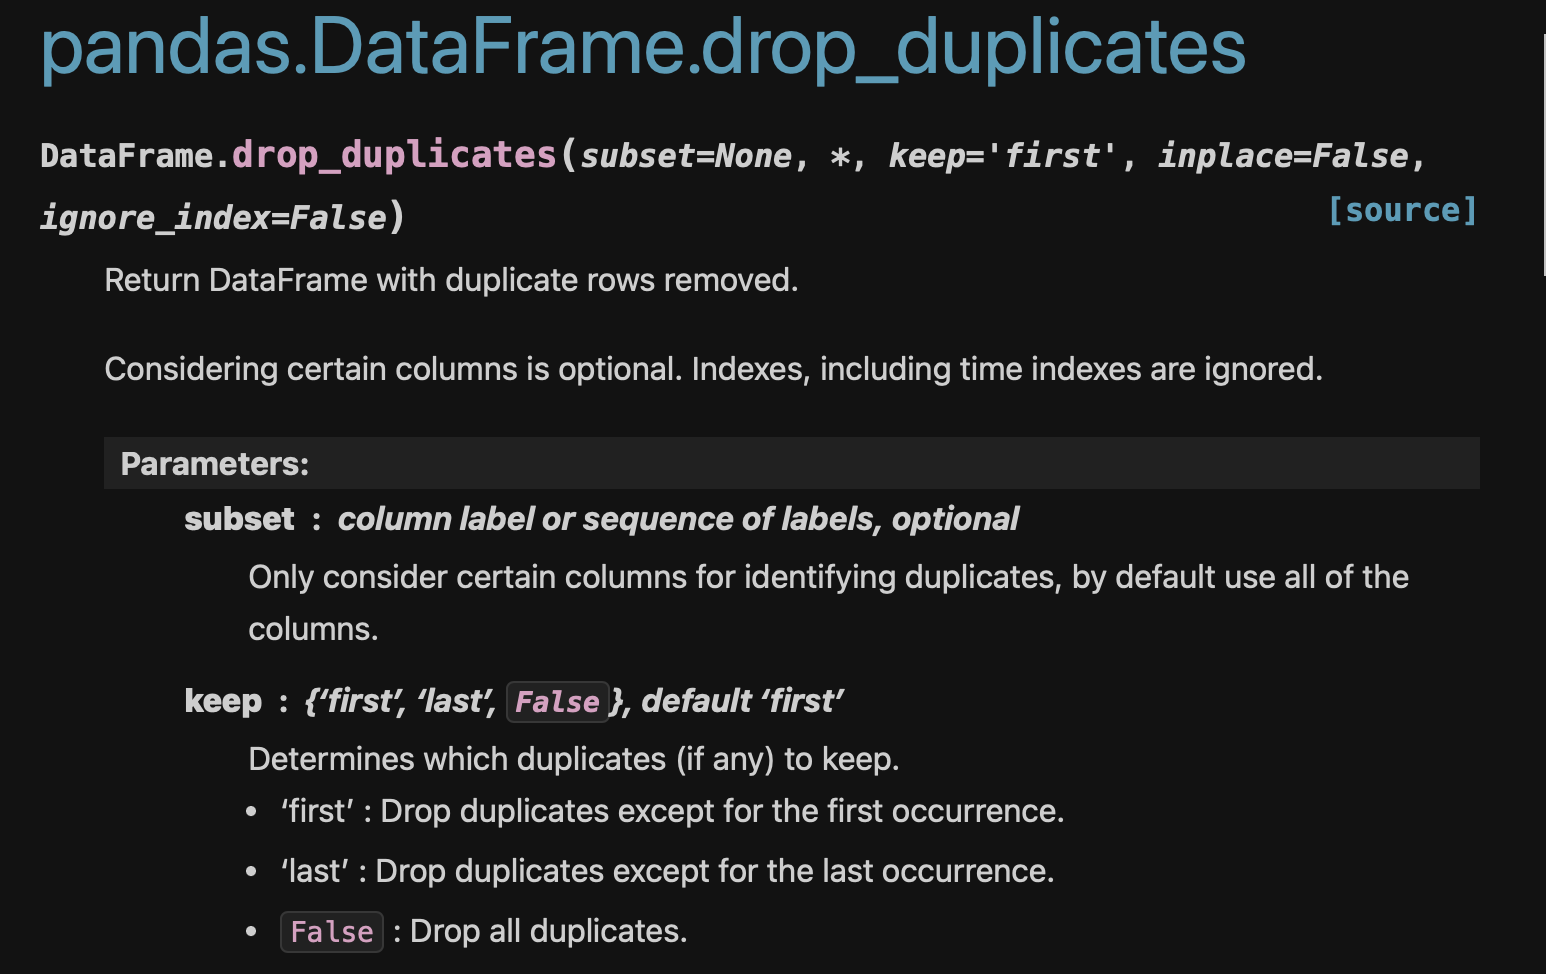

# ข้อมูลบางตัวในชุดข้อมูลมีลักษณะผิดปกติหรือแตกต่างจากข้อมูลส่วนใหญ่ (Outlier)

In [ ]:
from matplotlib import pyplot as plt

## Example

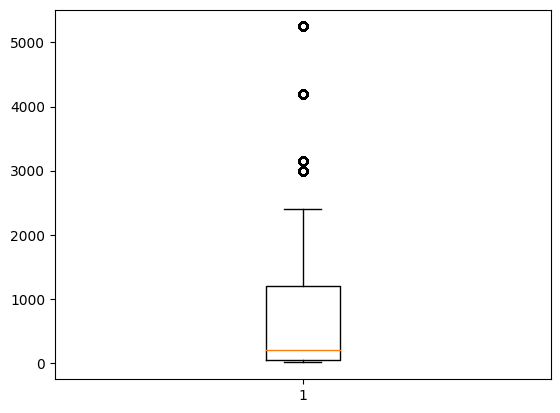

In [ ]:
plt.boxplot(shopping_data['price']);

## Fix

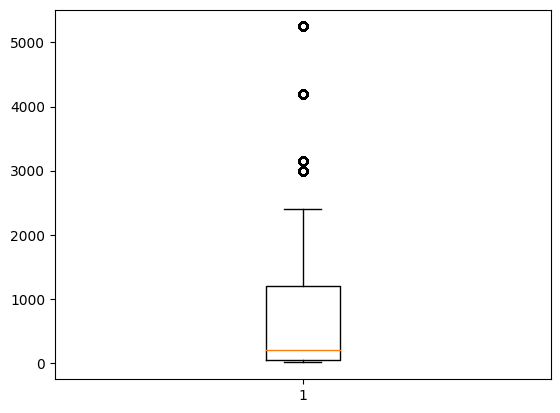

In [ ]:
ret = plt.boxplot(shopping_data['price'])

In [ ]:
ret

{'whiskers': [<matplotlib.lines.Line2D at 0x7e3c79d26f50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e3c79d27490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e3c79d26cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e3c79d279d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e3c79d27c70>],
 'means': []}

In [ ]:
ret['whiskers'][0].get_ydata()

array([45.45,  5.23])

In [ ]:
ret['whiskers'][1].get_ydata()

array([1200.32, 2400.68])

In [ ]:
ret['whiskers'][1].get_ydata()[1]

2400.68

In [ ]:
shopping_data[shopping_data['price']<=ret['whiskers'][1].get_ydata()[1]]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
...,...,...,...,...,...,...,...,...,...,...
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity


# ค่าตัวแปรบางตัวที่ไม่ถูกต้อง (Erroneous Data)

In [ ]:
shopping_data.sort_values(by='age')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
69089,I907811,C167489,Male,18,Shoes,3,1800.51,Debit Card,12/9/2022,Kanyon
95060,I128262,C687788,Male,18,Toys,4,143.36,Cash,2/5/2021,Mall of Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
2443,I115916,C338582,Male,18,Shoes,5,3000.85,Debit Card,23/08/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
66267,I433176,C202678,Male,69,Toys,5,179.20,Credit Card,27/03/2021,Istinye Park
66279,I213234,C176169,Female,69,Shoes,2,1200.34,Credit Card,7/10/2021,Viaport Outlet
85428,I117055,C208685,Female,69,Souvenir,2,23.46,Cash,15/09/2022,Metrocity
66133,I288825,C345511,Female,69,Clothing,1,300.08,Credit Card,23/07/2021,Mall of Istanbul


## Example

### แก้ค่า age ของ invoice_no = [I280590,I210628] เป็น less than 18

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [ ]:
shopping_data.loc[55784,'age'] = 'less than 18'
shopping_data.loc[78728,'age'] = 'less than 18'

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


In [ ]:
shopping_data.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


### ทดลองประมวลผล col age

### สมมติว่า error บอกว่าไม่สามารถประมวลผลค่า 'less than 18' ได้

### ตามหาว่าค่าที่ทำให้ error อยู่ที่ไหน

In [ ]:
shopping_data[shopping_data.eq('less than 18').any(1)]

<ipython-input-60-4744250e9fad>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  shopping_data[shopping_data.eq('less than 18').any(1)]


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,less than 18,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,less than 18,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


## Fix

### แทนค่า ด้วยค่าที่เหมาะสม

In [ ]:
shopping_data['age'] = shopping_data['age'].replace('less than 18',17)

In [ ]:
shopping_data[(shopping_data['invoice_no']=='I280590') | (shopping_data['invoice_no']=='I210628')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
55784,I210628,C525437,Female,17,Books,2,30.30,Cash,30/09/2022,Forum Istanbul
78728,I280590,C142284,Female,17,Clothing,2,600.16,Debit Card,26/10/2022,Forum Istanbul


# ข้อมูลมีค่าตัวแปรไม่สอดคล้องซึ่งกันและกัน (Inconsistent)

## Example

เกิดเมื่อรวมข้อมูลจากหลาย ๆ แหล่งแล้ว ค่าใน col ไม่เป็นไปในทิศทางเดียวกัน เช่น column อายุไม่ตรงกับ column วันเกิดหลังจากการคำนวณอายุแล้ว

## Fix

### เลือกเก็บเฉพาะ column ที่ถูกต้องและเหมาะสมที่สุด

# Data Integration (การรวมข้อมูลจากแหล่งข้อมูลหลายๆ แหล่ง)

Data From Pandas102 of DataViz2023

In [ ]:
sep_df = pd.read_excel('/content/drive/MyDrive/DataViz23Data/BudgetSep65.xlsx', header=8, skipfooter=26)
sep_df = sep_df.iloc[-2:,:15]
sep_df['เดือน-ปี'] = len(sep_df)*['sep-65']
sep_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65


In [ ]:
oct_df = pd.read_excel('/content/drive/MyDrive/DataViz23Data/BudgetDec65.xlsx', header=9, skipfooter=27)
oct_df = oct_df.iloc[-2:,:15]
oct_df['เดือน-ปี'] = len(oct_df)*['oct-65']
oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q1,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q1.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี
2,ประจำ,6822.811789,NaN,12.706842,3984.779058,58.403766,35.0,23.403766,3997.485900,58.590007,35.33,23.260007,2825.325889,NaN,NaN,oct-65
3,ลงทุน,6180.211723,NaN,457.295806,1291.209026,20.892634,19.0,1.892634,1748.504832,28.291989,28.96,-0.668011,4431.706890,4.0,6.0,oct-65


## 1. รวมแกน Y (add rows - เพิ่ม Data)

เกิดตอนที่ data ที่มีหลายเวอชัน มีหลายๆปี แล้วนำมาต่อกัน

In [ ]:
sep_oct_df = pd.concat([sep_df,oct_df])
sep_oct_df

,รายการ,งบประมาณ,สำรองเงินมีหนี้,PO,เบิกจ่าย,ร้อยละ\nเบิกจ่าย,เป้า\nหมาย Q4,*/- เป้าหมาย,การใช้จ่าย (PO+เบิกจ่าย),ร้อยละ\nการใช้จ่าย,เป้า\nหมาย Q4.1,*/- เป้าหมาย.1,คงเหลือ\nหลังหักใช้จ่าย,ลำดับเบิกจ่าย,ลำดับ\nใช้จ่าย,เดือน-ปี,เป้า\nหมาย Q1,เป้า\nหมาย Q1.1
2,ประจำ,1.892013e+10,7.925745e+07,7.131600e+07,1.880196e+10,99.375405,98.0,1.375405,1.895253e+10,100.171242,100.0,0.171242,-3.239918e+07,NaN,NaN,sep-65,NaN,NaN
3,ลงทุน,9.605258e+09,2.683430e+08,1.119320e+09,8.201965e+09,85.390363,75.0,10.390363,9.589628e+09,99.837275,100.0,-0.162725,1.563013e+07,6.0,15.0,sep-65,NaN,NaN
2,ประจำ,6.822812e+03,NaN,1.270684e+01,3.984779e+03,58.403766,NaN,23.403766,3.997486e+03,58.590007,NaN,23.260007,2.825326e+03,NaN,NaN,oct-65,35.0,35.33
3,ลงทุน,6.180212e+03,NaN,4.572958e+02,1.291209e+03,20.892634,NaN,1.892634,1.748505e+03,28.291989,NaN,-0.668011,4.431707e+03,4.0,6.0,oct-65,19.0,28.96


## 2. รวมแกน X (add columns - เพิ่ม feature)

In [ ]:
unit_df = pd.read_csv('/content/drive/MyDrive/DataViz23Data/opendata_unittype-2.csv')
unit_df.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,1.0,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11


In [ ]:
project_df = pd.read_csv('/content/drive/MyDrive/DataViz23Data/opendata_project-2.csv')
project_df.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
0,20809.0,5ec3409884c1860019f3298d,Baan Laksiri Surin-Korco,บ้านหลักศิริ สุรินทร์-คอโค,3,Townhome,ทาวน์โฮม,1490000.0,developer_7326,"LAK SIRI REAL ESTATE CO., LTD.",...,NaN,NaN,1.0,1.0,2020-05-19 09:12:40,NaN,2020-12-04 10:33:10,baania,https://baania.com/th/project/บ้านหลักศิริ-สุร...,2023-06-11
1,4268.0,project_15905,Liberty Park 2,ลิเบอร์ตี้ พาร์ค 2,2,Condo,คอนโด,6500000.0,developer_10510,NaN,...,0.0,0.0,1.0,1.0,2019-06-28 16:06:45,1998-12-31 07:00:00,2020-12-04 10:39:27,baania,https://baania.com/th/project/ลิเบอร์ตี้-พาร์ค...,2023-06-11
2,5849.0,62b2b082cb0d2c0014be01a6,Pleno Paholyothin-Saimai 2,พลีโน่ พหลโยธิน-สายไหม 2,3,Townhome,ทาวน์โฮม,2790000.0,developer_1760,"AP (THAILAND) PUB CO., LTD.",...,1.0,NaN,1.0,1.0,2022-06-22 13:02:42,2024-01-01 07:00:00,2023-03-20 15:00:04,baania,https://baania.com/th/project/พลีโน่-พหลโยธิน-...,2023-06-11
3,21762.0,project_6010,Baan Thara Rin,บ้านธารารินทร์,1,Detached House,บ้าน,3100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,2017-04-19 14:41:10,NaN,2022-11-07 12:30:02,baania,https://baania.com/th/project/บ้านธารารินทร์-p...,2023-06-11
4,10751.0,project_11312,The Forest Hill,เดอะ ฟอเรสต์ ฮิลล์,1,Detached House,บ้าน,2450000.0,developer_7313,"Cholsiri Property Co., Ltd.",...,1.0,NaN,1.0,1.0,2017-10-30 14:10:50,2018-12-31 07:00:00,2022-08-15 16:00:05,baania,https://baania.com/th/project/เดอะ-ฟอเรสต์-ฮิล...,2023-06-11


In [ ]:
project_df[project_df.duplicated(subset=['project_id'])]

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project,day
184,16407.0,project_3669,Roi Pruksa Kampangsan,ร้อยพฤกษา กำแพงแสน,3,Townhome,ทาวน์โฮม,1990000.0,developer_2256,"MIDA PROPERTY CO., LTD.",...,1.0,NaN,1.0,1.0,2017-01-30 11:06:01,NaN,2023-05-18 09:30:02,baania,https://baania.com/th/project/ร้อยพฤกษา-กำแพงแ...,2023-06-11
365,23040.0,project_13423,Phuket Villa Kathu 3,ภูเก็ตวิลล่า กะทู้ 3,4,Commercial,อาคารพาณิชย์,3129000.0,developer_8580,"Phuket Villa Corporation Co., Ltd.",...,1.0,NaN,NaN,1.0,2018-05-21 11:11:45,2018-12-31 07:00:00,2022-03-21 14:00:06,baania,https://baania.com/th/project/ภูเก็ตวิลล่า-กะท...,2023-06-11
383,16132.0,63f47baa9b028e00130ae47c,M Life Sukhumvit-Bangpu 87,เอ็มไลฟ์ สุขุมวิท-บางปู 87,3,Townhome,ทาวน์โฮม,2160000.0,developer_10577,"MASON DEVELOPMENT CO., LTD.",...,1.0,NaN,1.0,1.0,2023-02-21 15:07:06,NaN,2023-02-21 15:30:03,baania,https://baania.com/th/project/เอ็มไลฟ์-สุขุมวิ...,2023-06-11
444,13929.0,5f04029cb285eb00194de1dd,City park sakaeo,ซิตี้ปาร์ค สระแก้ว 2,1,Detached House,บ้าน,1900000.0,5f03f344b285eb00194de191,"Sa Kaeo Development Co., Ltd.",...,1.0,NaN,NaN,1.0,2020-07-07 12:05:32,2016-01-01 07:00:00,2020-12-04 10:33:25,baania,https://baania.com/th/project/ซิตี้ปาร์ค-สระแก...,2023-06-11
465,3163.0,5e8466c9e146a400123ef189,Udomsuk Place Kabinburi,อุดมสุข เพลส กบินทร์บุรี,20000,Twin house,บ้านแฝด,1690000.0,5e8465ece146a400123ef182,"Udomsuk Kabinburi House and Land Co., Ltd.",...,1.0,NaN,1.0,1.0,2020-04-01 17:02:49,2020-01-01 07:00:00,2020-12-04 10:32:05,baania,https://baania.com/th/project/อุดมสุข-เพลส-กบิ...,2023-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,6509.0,6177730c551dd10015a6916d,Bliss Baankhai Rayong,บลิซ บ้านค่าย ระยอง,20000,Twin house,บ้านแฝด,1890000.0,developer_97,SUPALAI PUBLIC COMPANY LIMITED,...,1.0,1.0,1.0,1.0,2021-10-26 10:16:28,NaN,2022-09-02 14:00:05,baania,https://baania.com/th/project/บลิซ-บ้านค่าย-ระ...,2023-06-11
23857,2954.0,project_13943,Baan Chalongsuk Phuket,บ้านฉลองสุข ภูเก็ต,4,Commercial,อาคารพาณิชย์,2690000.0,developer_8893,"Baan Charungklin Co,.Ltd.",...,NaN,NaN,NaN,1.0,2018-06-22 09:31:14,2013-12-31 07:00:00,2020-12-04 10:38:43,baania,https://baania.com/th/project/บ้านฉลองสุข-ภูเก...,2023-06-11
23860,13953.0,project_3144,Baan Alicha 5 Phutabucha 36,บ้านอลิชา 5 พุทธบูชา 36,20000,Twin house,บ้านแฝด,2600000.0,developer_2175,"Alicha Group Co., Ltd.",...,NaN,NaN,NaN,1.0,2016-12-15 16:46:06,2012-12-31 07:00:00,2020-12-04 10:45:47,baania,https://baania.com/th/project/บ้านอลิชา-5-พุทธ...,2023-06-11
23861,17686.0,project_3585,The Plant Wongwaen - Lumlukka Klong 5,เดอะ แพลนท์ วงแหวน-ลำลูกกา คลอง 5,1,Detached House,บ้าน,3350000.0,developer_1026,"PRUKSA REAL ESTATE PUB CO., LTD.",...,1.0,1.0,NaN,1.0,2017-01-25 13:33:17,2022-12-31 07:00:00,2023-04-28 16:30:03,baania,https://baania.com/th/project/เดอะ-แพลนท์-วงแห...,2023-06-11


In [ ]:
project_df = project_df.drop_duplicates(subset='project_id', keep='last')

In [ ]:
unit_df['province_en'] = unit_df['project_id'].map(project_df.set_index('project_id')['province_name_en'])

In [ ]:
unit_df

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype,day,province_en
0,37586,unittype_35602,project_15270,Studio,2,Condo,คอนโด,NaN,30.0,3700000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:22:56,2020-10-14 20:21:01,baania,https://baania.com/th/project/ไลฟ์-แอท-รัชดา-ส...,2023-06-11,NaN
1,9427,unittype_4487,project_1476,ภัทรสิน,3,Townhome,ทาวน์โฮม,NaN,NaN,2000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:20:17,2020-10-14 00:53:00,baania,https://baania.com/th/project/บ้านสวนทรัพย์ธาน...,2023-06-11,NaN
2,12994,unittype_37624,project_16674,Type B,3,Townhome,ทาวน์โฮม,24.0,96.0,NaN,...,NaN,NaN,NaN,NaN,2022-09-09 15:30:02,2022-09-09 15:03:18,baania,https://baania.com/th/project/สกายไลน์-อมตะ-16...,2023-06-11,NaN
3,19073,62286afcc74d880014871357,622861f7aae18f00134066d6,ทาวน์โฮมสองชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,1000000.0,...,NaN,NaN,NaN,NaN,2022-03-09 16:30:04,2022-03-09 16:17:44,baania,https://baania.com/th/project/รุ่งเรืองทรัพย์ว...,2023-06-11,Nakhon Si Thammarat
4,10907,unittype_8344,project_2821,2 Bedroom (ขายแล้ว),2,Condo,คอนโด,NaN,48.0,4200000.0,...,1.0,NaN,NaN,NaN,2021-11-12 13:24:53,2020-10-16 16:46:17,baania,https://baania.com/th/project/เดอะ-เทมโป-แกรนด...,2023-06-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43369,9507,unittype_5086,project_1635,บ้านเดี่ยวชั้นเดียว,1,Detached House,บ้าน,NaN,NaN,880000.0,...,NaN,NaN,NaN,NaN,2022-10-19 11:30:05,2022-10-19 11:17:08,baania,https://baania.com/th/project/บ้านคุรุสภา-นครร...,2023-06-11,NaN
43370,23721,unittype_15644,project_6109,บ้านเดี่ยวสองชั้น,1,Detached House,บ้าน,45.0,140.0,2400000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:24:19,2020-10-14 23:03:19,baania,https://baania.com/th/project/บ้านเต็มสิริ-1-6...,2023-06-11,NaN
43371,31551,unittype_21385,project_8392,อาคารพาณิชย์สี่ชั้น type B,4,Commercial,อาคารพาณิชย์,34.0,192.0,13000000.0,...,NaN,NaN,NaN,NaN,2021-11-12 13:19:31,2020-10-14 00:38:09,baania,https://baania.com/th/project/พระเงิน-เพลส-839...,2023-06-11,NaN
43372,29837,unittype_26243,project_10566,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,191.0,2600000.0,...,1.0,NaN,NaN,NaN,2020-12-04 10:47:10,2020-10-16 16:33:56,baania,https://baania.com/th/project/บ้านไทยวิลล่า-ศร...,2023-06-11,NaN


# Data Reduction (การลดปริมาณข้อมูลในการวิเคราะห์ข้อมูล)

## Reuduce number of data (Y-axis) - Sampling

### Sampling แบบกำหนดค่านาฬิกา

In [ ]:
shopping_data.sample(random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM


### Sampling แบบกำหนดค่า n

In [ ]:
shopping_data.sample(10, random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
65247,I137393,C726791,Female,37,Food & Beverage,3,15.69,Credit Card,19/10/2022,Kanyon
49419,I650563,C283975,Male,28,Clothing,3,900.24,Debit Card,11/6/2021,Mall of Istanbul
90371,I109001,C901685,Female,36,Toys,3,107.52,Credit Card,15/09/2022,Istinye Park
98492,I394097,C307872,Male,29,Food & Beverage,1,5.23,Credit Card,10/11/2022,Cevahir AVM
11309,I163506,C223150,Male,34,Food & Beverage,1,5.23,Cash,17/10/2021,Kanyon


### Sampling แบบกำหนดเป็น %

In [ ]:
shopping_data.sample(frac=0.2, random_state=6)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
81034,I209459,C312307,Female,18,Souvenir,1,11.73,Cash,13/05/2021,Cevahir AVM
91838,I351059,C292856,Male,41,Clothing,2,600.16,Credit Card,9/7/2021,Metropol AVM
20458,I323617,C325754,Female,24,Clothing,2,600.16,Credit Card,1/2/2022,Istinye Park
73343,I104653,C209092,Male,62,Toys,5,179.20,Cash,19/11/2022,Cevahir AVM
70406,I804767,C196027,Female,65,Clothing,3,900.24,Credit Card,28/03/2022,Istinye Park
...,...,...,...,...,...,...,...,...,...,...
75991,I189802,C338933,Female,63,Clothing,3,900.24,Credit Card,28/06/2021,Mall of Istanbul
85083,I121218,C125359,Male,42,Clothing,3,900.24,Debit Card,14/10/2021,Metrocity
55086,I365478,C904439,Female,62,Clothing,4,1200.32,Credit Card,19/01/2023,Viaport Outlet
1096,I145120,C293612,Female,60,Clothing,4,1200.32,Debit Card,4/2/2023,Metrocity


### Sampling แบบคืนค่า

In [ ]:
sam_no_replc = shopping_data.sample(frac=0.2, random_state=6)
sam_no_replc.duplicated().any() # ไม่มีซ้ำ เพราะแต่ละตัวมันจับกันแค่รอบเดียว

False

In [ ]:
sam_with_replc = shopping_data.sample(frac=0.2, replace=True, random_state=6)
sam_with_replc.duplicated().any() # Output=True แสดงว่า มีบาง data ที่ถูกสุ่มมา 2 รอบ

True

### Sampling แบบเพิ่มจำนวนข้อมูล

In [ ]:
sam_with_replc_120 = shopping_data.sample(frac=1.2, replace=True, random_state=6)
sam_with_replc_120.shape

(119348, 10)

## Reuduce dimension of data (X-axis) - PCA & Stats

## ดูใน Sheet PCA >>>> BSC_DPDM23